Make ssure your system had tesseract

In [1]:
#!sudo apt-get install tesseract-ocr

In [2]:
#!pip3 install pillow
!pip3 install pytesseract

  Using cached https://files.pythonhosted.org/packages/19/5e/23dcc0ce3cc2abe92efd3cd61d764bee6ccdf1b667a1fb566f45dc249953/Pillow-7.0.0-cp36-cp36m-manylinux1_x86_64.whl


In [25]:
from PIL import Image
import numpy as np
import pytesseract
from IPython.display import display
from matplotlib import pyplot as plt

Now let's use a picture of one of my project's README files

__EXAMPLE 1__

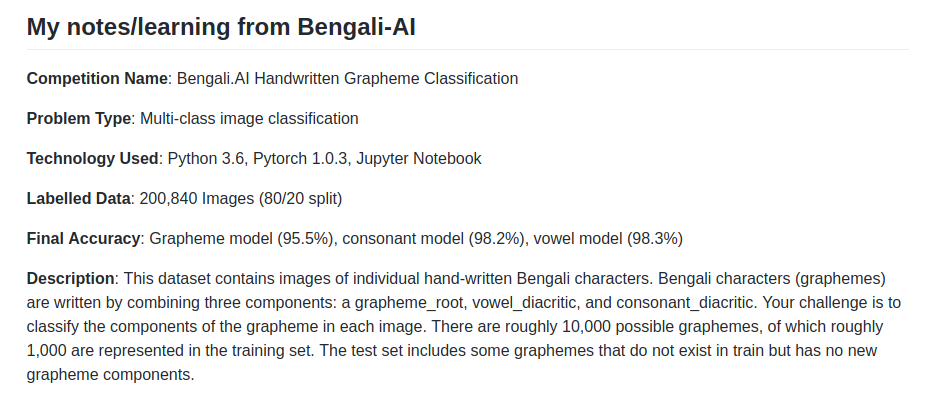

In [4]:
im = Image.open('README.png')
display(im)

^ This is how the input image looks like

In [5]:
extracted_text = pytesseract.image_to_string(Image.open('README.png'),lang='eng')

In [6]:
print(extracted_text)

My notes/learning from Bengali-Al

Competition Name: Bengali.Al Handwritten Grapheme Classification
Problem Type: Multi-class image classification

Technology Used: Python 3.6, Pytorch 1.0.3, Jupyter Notebook

Labelled Data: 200,840 Images (80/20 split)

Final Accuracy: Grapheme model (95.5%), consonant model (98.2%), vowel model (98.3%)

Description: This dataset contains images of individual hand-written Bengali characters. Bengali characters (graphemes)
are written by combining three components: a grapheme_root, vowel_diacritic, and consonant_diacritic. Your challenge is to
classify the components of the grapheme in each image. There are roughly 10,000 possible graphemes, of which roughly
1,000 are represented in the training set. The test set includes some graphemes that do not exist in train but has no new
grapheme components.


^ That look very accurate

__EXAMPLE 2__

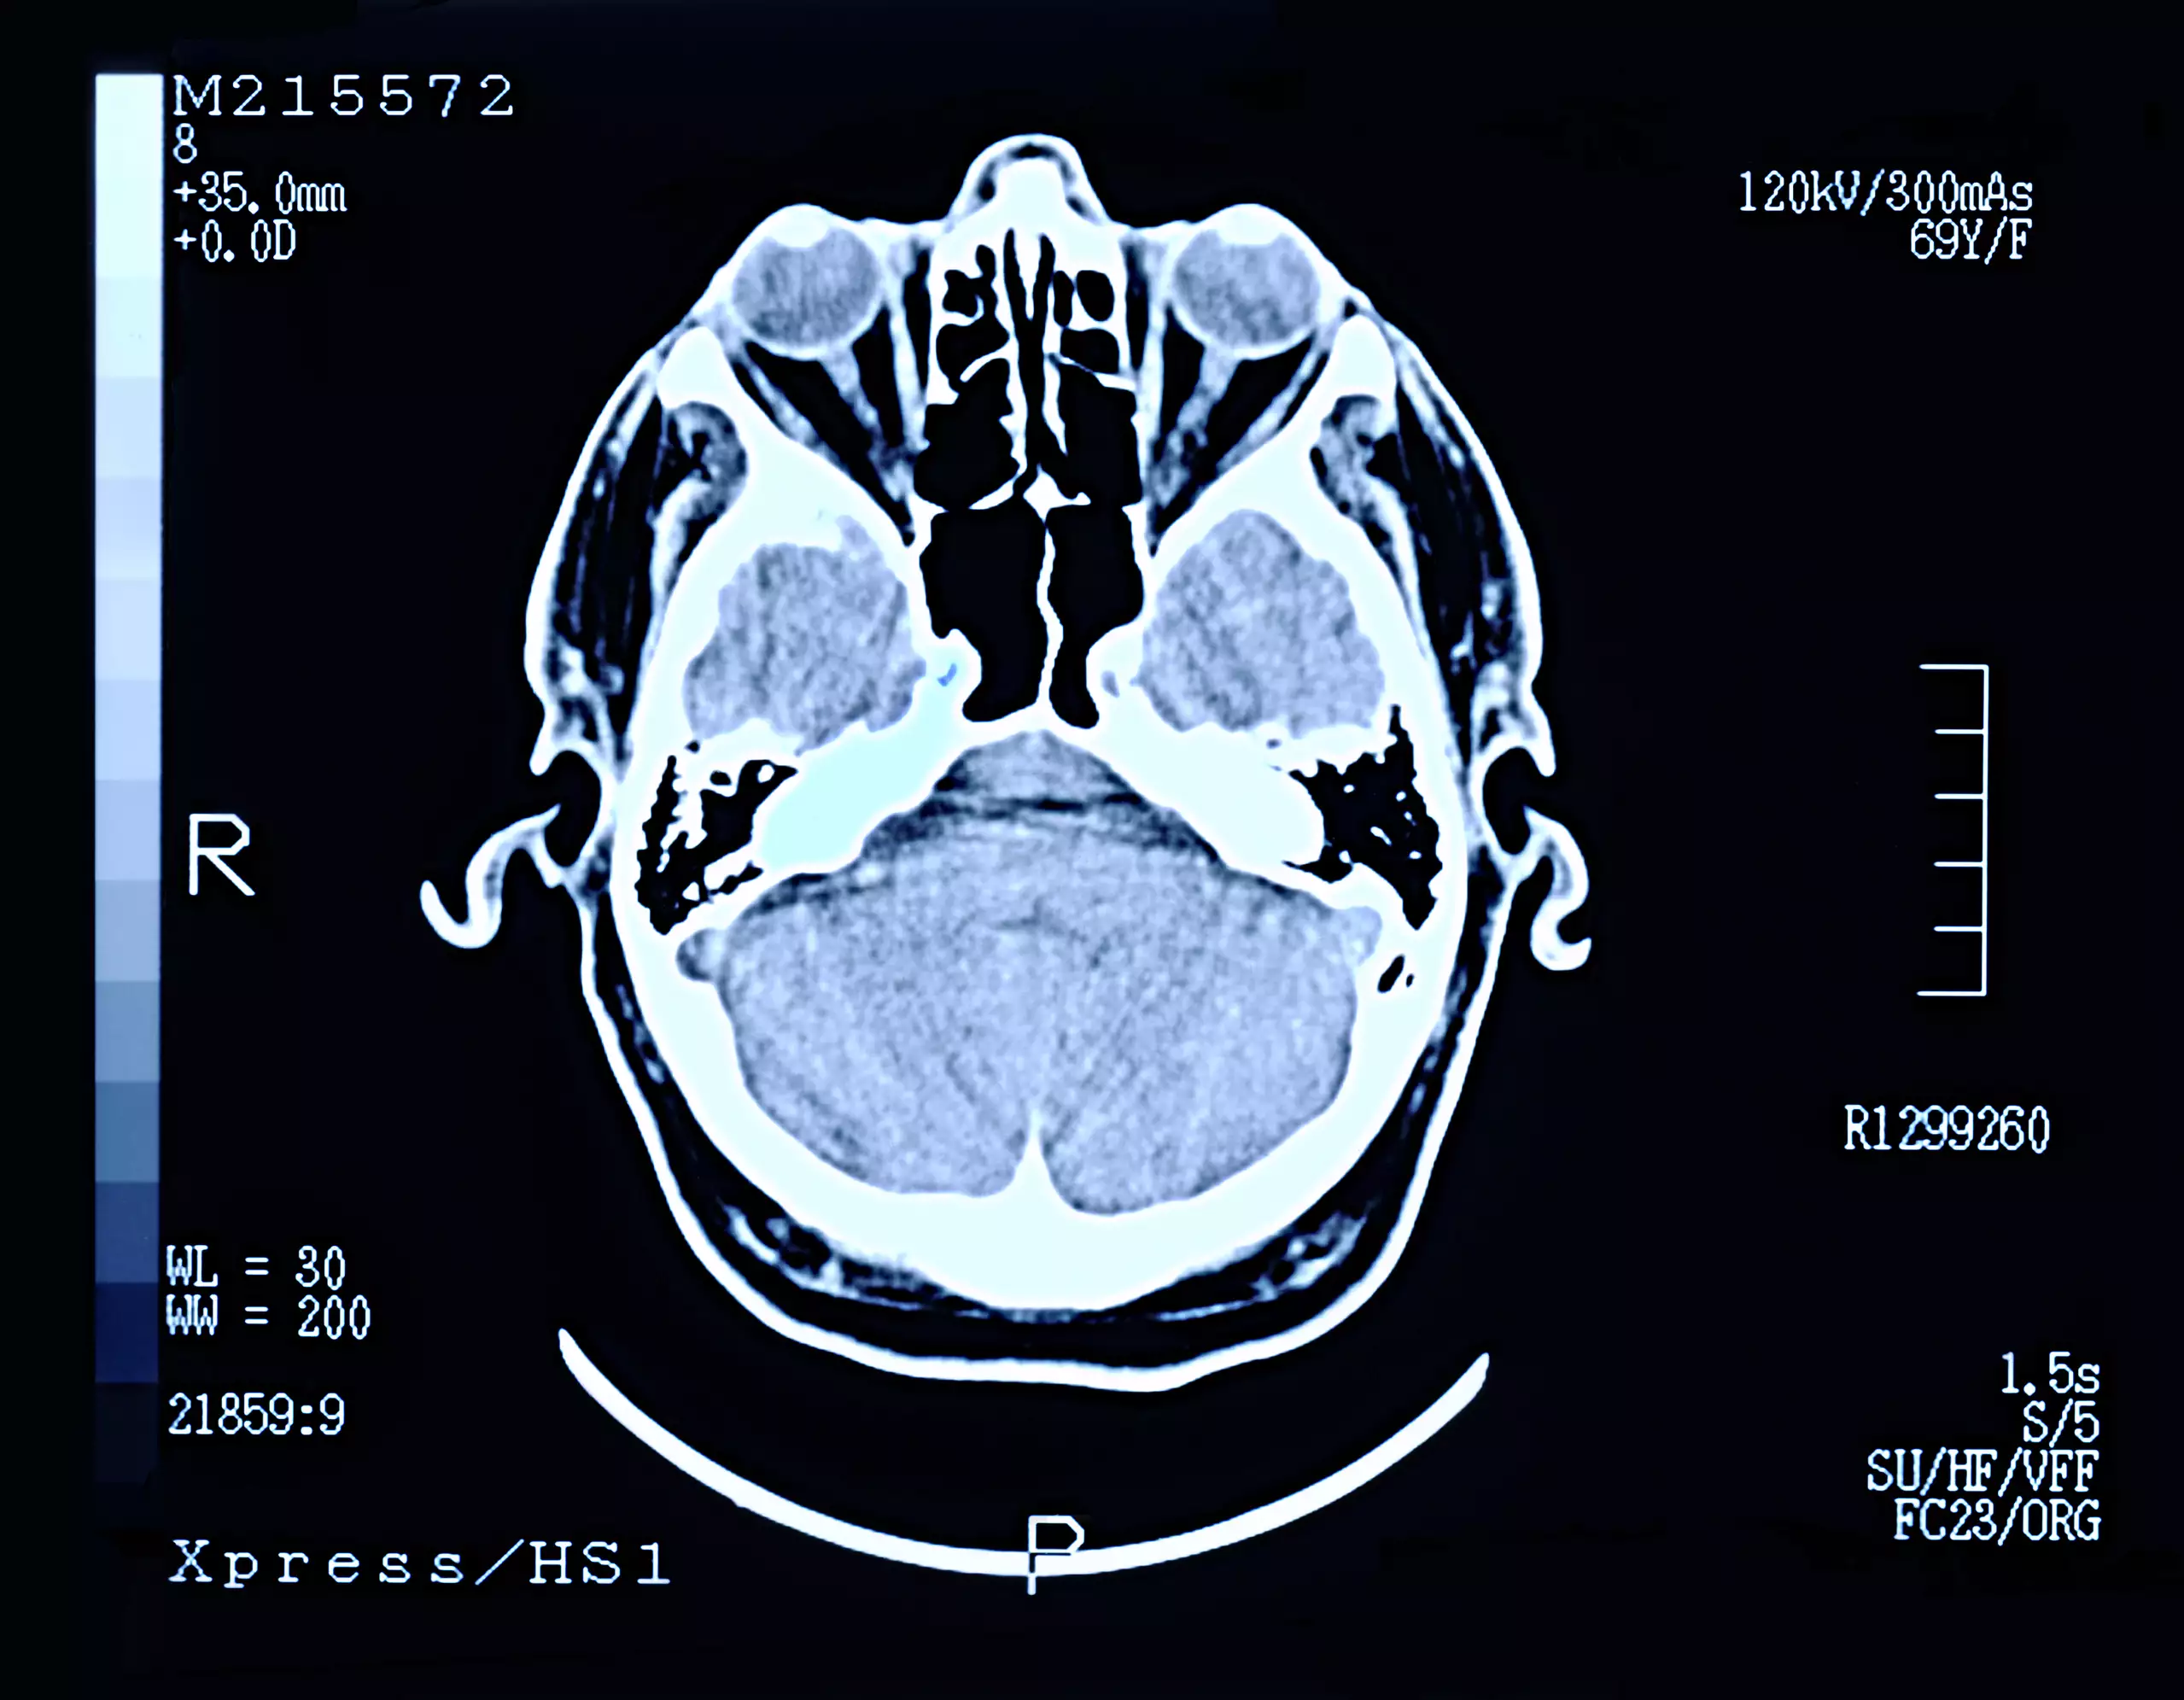

In [7]:
im = Image.open('sample_diacom.jpg').convert('RGB')
display(im)

In [8]:
im.size

(2558, 1991)

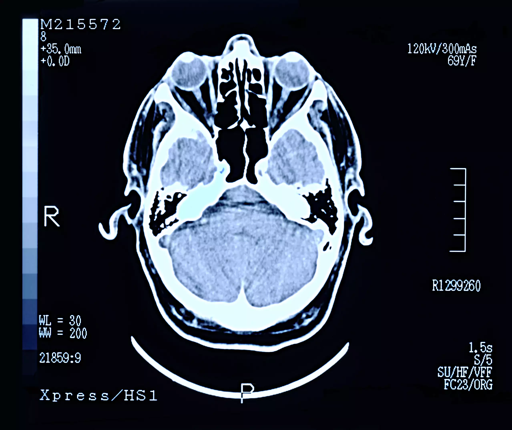

In [9]:
im2 = im.resize((512,430))
display(im2)

In [10]:
extracted_text = pytesseract.image_to_string(im,lang='eng')
print(extracted_text)

iprahamene tie

 

+35, NRA
ri S03
passer
a
Sarai -
20S
Aton S76
SU/HE/VEF
FC23/0RG

Apress/YHSl


In [11]:
extracted_text = pytesseract.image_to_string(im2,lang='eng')
print(extracted_text)

eee
fem
po)

 

eva

  

PTE
Col


^ Looks like the dimention does make some difference in terms of the extracted output. 

And also it is not very accuate as we have text of various size right next to each other.

In [12]:
pytesseract.image_to_data(im,lang='eng')

'level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext\n1\t1\t0\t0\t0\t0\t0\t0\t2558\t1991\t-1\t\n2\t1\t1\t0\t0\t0\t203\t87\t397\t104\t-1\t\n3\t1\t1\t1\t0\t0\t203\t87\t397\t104\t-1\t\n4\t1\t1\t1\t1\t0\t203\t87\t397\t104\t-1\t\n5\t1\t1\t1\t1\t1\t203\t87\t280\t104\t0\tiprahamene\n5\t1\t1\t1\t1\t2\t503\t87\t97\t50\t15\ttie\n2\t1\t2\t0\t0\t0\t488\t152\t1380\t1482\t-1\t\n3\t1\t2\t1\t0\t0\t488\t152\t1380\t1482\t-1\t\n4\t1\t2\t1\t1\t0\t488\t152\t1380\t1482\t-1\t\n5\t1\t2\t1\t1\t1\t488\t152\t1380\t1482\t95\t \n2\t1\t3\t0\t0\t0\t195\t198\t2266\t1613\t-1\t\n3\t1\t3\t1\t0\t0\t195\t198\t2266\t1613\t-1\t\n4\t1\t3\t1\t1\t0\t203\t198\t2177\t55\t-1\t\n5\t1\t3\t1\t1\t1\t203\t212\t100\t39\t79\t+35,\n5\t1\t3\t1\t1\t2\t2038\t198\t342\t55\t0\tNRA\n4\t1\t3\t1\t2\t0\t204\t200\t2176\t110\t-1\t\n5\t1\t3\t1\t2\t1\t204\t200\t203\t107\t17\tri\n5\t1\t3\t1\t2\t2\t2238\t253\t142\t57\t8\tS03\n4\t1\t3\t1\t3\t0\t2160\t1294\t241\t57\t-1\t\n5\t1\t3\t1\t3\t1\t2160\t1294\t241\t57\t0\

In [13]:
import cv2
img = cv2.imread('sample_diacom.jpg')

In [14]:
d = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
n_boxes = len(d['level'])
n_boxes

40

In [15]:
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

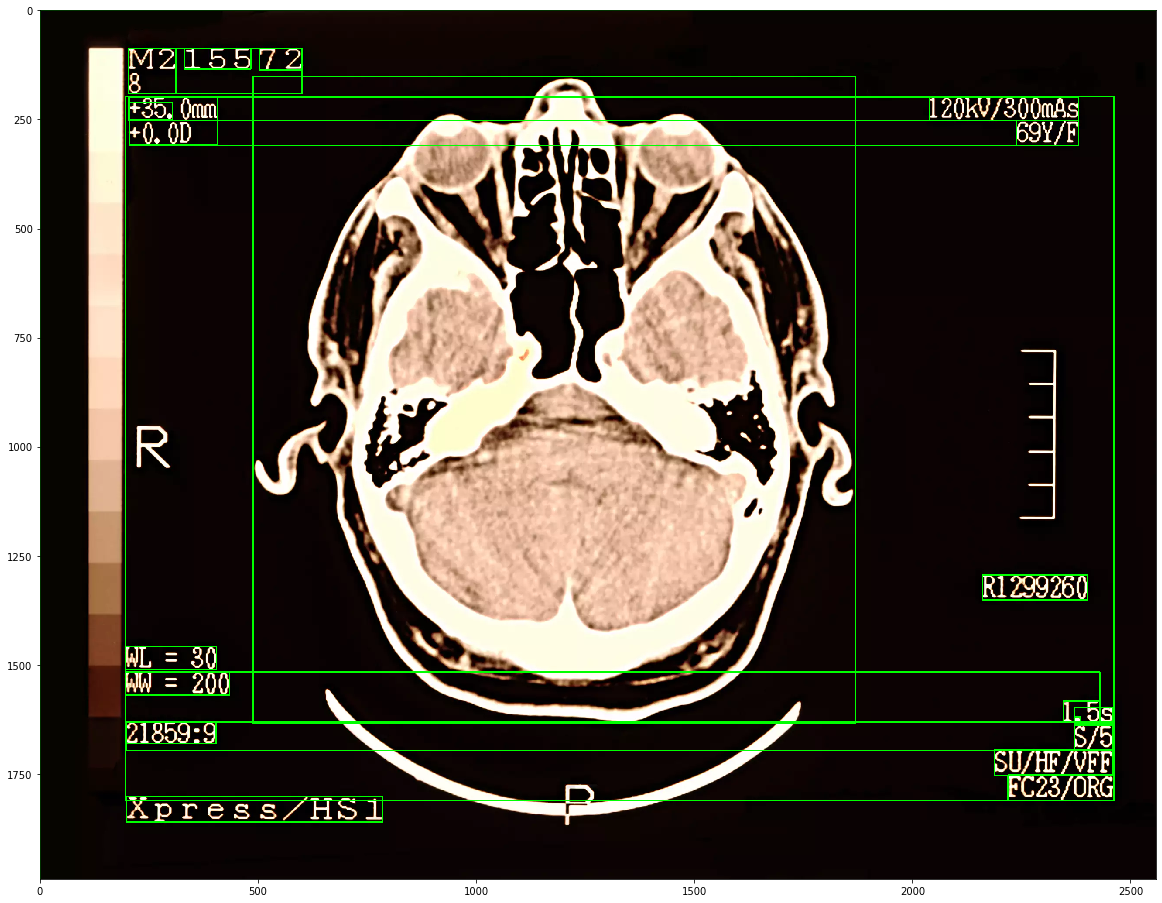

In [16]:
plt.figure(figsize = (20,20))
plt.imshow(img)

^ There are bounding boxes for every text string but the algorithm also chooses the non-text images area as well for a bounding box.

One possible reason behind this low accuracy on example 2 could be, Tesseract by default expects a page of text when it segments an image. If we are just seeking OCR in a small region, we need to try a different segmentation mode, using the — psm argument.

There are several ways a page of text can be analyzed. The tesseract API provides 14-page segmentation modes if you want to run OCR on only a small region or in different orientations, etc.

### psm options

These page segmentation modes are:
 - 0    Orientation and script detection (OSD) only.
 - 1    Automatic page segmentation with OSD.
 - 2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
 - 3    Fully automatic page segmentation, but no OSD. (Default)
 - 4    Assume a single column of text of variable sizes.
 - 5    Assume a single uniform block of vertically aligned text.
 - 6    Assume a single uniform block of text.
 - 7    Treat the image as a single text line.
 - 8    Treat the image as a single word.
 - 9    Treat the image as a single word in a circle.
 - 10    Treat the image as a single character.
 - 11    Sparse text. Find as much text as possible in no particular order.
 - 12    Sparse text with OSD.
 - 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.

In [20]:
pytesseract.pytesseract?

### oem options

OCR Language Data files contain pretrained language data from the OCR Engine. They are required during the initialization of the API call. There are 3 types of data files.
- __tessdata-best__: Most accurate but slowest, LSTM only
- __tessdata__: Less accurate but faster than tessdata-best, contains legacy plus LSTM 
- __tessdata-fast__: Fastest but least accurate, integerized LSTM

#### oem arguments
 the legacy tesseract engine (--oem 0) 
 the new LSTM neural net based engine (--oem 1)

In [17]:
custom_oem_psm_config = r'--oem 1 --psm 1'
tt = pytesseract.image_to_string(im, config=custom_oem_psm_config)
print(tt)

iprahamene tie

 

+35, NRA
ri S03
passer
a
Sarai -
20S
Aton S76
SU/HE/VEF
FC23/0RG

Apress/YHSl


In [18]:
custom_oem_psm_config = r'--oem 3 --psm 1'
tt = pytesseract.image_to_string(im, config=custom_oem_psm_config)
print(tt)

iprahamene tie

 

+35, NRA
ri S03
passer
a
Sarai -
20S
Aton S76
SU/HE/VEF
FC23/0RG

Apress/YHSl


__Nothing really helps us. The thing with medical images is the text is around the periphery and not distributed throughout.__

### So let's try dividing image into patches, if that improves the accuracy

In [21]:
im.size

(2558, 1991)

In [38]:
width = im.size[0]
height = im.size[1]
width, height

(2558, 1991)

In [26]:
np.asarray

<function numpy.asarray(a, dtype=None, order=None)>

In [41]:
np.asarray(im)[:width,:height]

array([[[ 5,  2,  6],
        [ 5,  2,  6],
        [ 5,  2,  6],
        ...,
        [ 2,  4,  8],
        [ 2,  4,  8],
        [ 2,  4,  8]],

       [[ 5,  2,  6],
        [ 5,  2,  6],
        [ 5,  2,  6],
        ...,
        [ 2,  4,  8],
        [ 2,  4,  8],
        [ 2,  4,  8]],

       [[ 5,  2,  6],
        [ 5,  2,  6],
        [ 5,  2,  6],
        ...,
        [ 2,  4,  8],
        [ 2,  4,  8],
        [ 2,  4,  8]],

       ...,

       [[ 0,  5,  6],
        [ 0,  5,  6],
        [ 0,  5,  6],
        ...,
        [ 3,  2, 10],
        [ 3,  2, 10],
        [ 3,  2, 10]],

       [[ 0,  5,  6],
        [ 0,  5,  6],
        [ 0,  5,  6],
        ...,
        [ 3,  2, 10],
        [ 3,  2, 10],
        [ 3,  2, 10]],

       [[ 0,  5,  6],
        [ 0,  5,  6],
        [ 0,  5,  6],
        ...,
        [ 3,  2, 10],
        [ 3,  2, 10],
        [ 3,  2, 10]]], dtype=uint8)

In [44]:
img_patches = []

wd = int(width/3)
ht = int(height/3)

img_patches.append(np.asarray(im)[:wd,:ht])
img_patches.append(np.asarray(im)[wd:2*wd,:ht])
img_patches.append(np.asarray(im)[2*wd:width,:ht])

img_patches.append(np.asarray(im)[:wd,ht:2*ht])
img_patches.append(np.asarray(im)[wd:2*wd,ht:2*ht])
img_patches.append(np.asarray(im)[2*wd:width,ht:2*ht])

img_patches.append(np.asarray(im)[:wd,2*ht:height])
img_patches.append(np.asarray(im)[wd:2*wd,2*ht:height])
img_patches.append(np.asarray(im)[2*wd:width,2*ht:height])


In [45]:
len(img_patches)

9

In [49]:
plt.subplots??

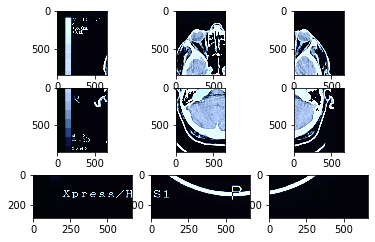

In [48]:
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(img_patches[0])
axarr[0,1].imshow(img_patches[3])
axarr[0,2].imshow(img_patches[6])

axarr[1,0].imshow(img_patches[1])
axarr[1,1].imshow(img_patches[4])
axarr[1,2].imshow(img_patches[7])

axarr[2,0].imshow(img_patches[2])
axarr[2,1].imshow(img_patches[5])
axarr[2,2].imshow(img_patches[8])

In [52]:
custom_oem_psm_config = r'--oem 3 --psm 1'

for i in range(len(img_patches)):
    print(pytesseract.image_to_string(img_patches[i],config=custom_oem_psm_config))

HRS
SSLOMm IU

+0, OD

o
eorex)
(-an-T-an-)

SIF
a
21859:

0

CO
Xpress/H








In [53]:
print(pytesseract.image_to_string(im, config=custom_oem_psm_config))

iprahamene tie

 

+35, NRA
ri S03
passer
a
Sarai -
20S
Aton S76
SU/HE/VEF
FC23/0RG

Apress/YHSl


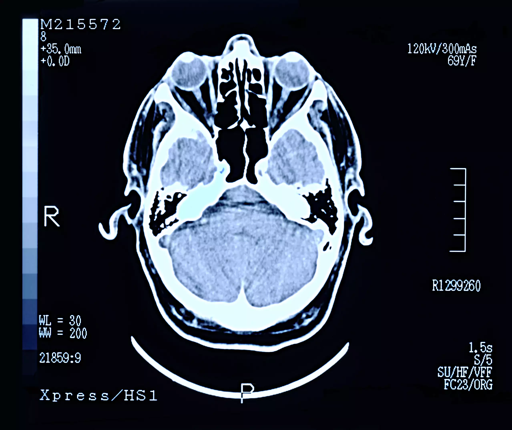

In [54]:
display(im2)

It seems the divide and conquer approach did help with a few things missed by entire image approach but then compenesated by misidentifying a few more things.

Let's see if some preprocessing would help us.

In [56]:
# fromn here: https://nanonets.com/blog/ocr-with-tesseract/

import cv2
import numpy as np

img = cv2.imread('image.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

Let's test them.

In [62]:
im = cv2.imread('sample_diacom.jpg')

In [63]:
# Original
print(pytesseract.image_to_string(im,config=custom_oem_psm_config))

NOR ORENE Nie

 

ae URIS
Oe SI
papas
a
aril €
PES }S)
AtsoRe S75
SAYA
FC23/0RG

Apress/YHSl


In [64]:
# get_grayscale 
print(pytesseract.image_to_string(get_grayscale(im),config=custom_oem_psm_config))

RENE I

 

aoa 120k¥/300mAs
rn 69Y/F
7 reas erat
WL = 30
WW = 200
1.5s
21859:9 Sy As)
SU/HF/VFF
FC23/0RG

Apress/HS1


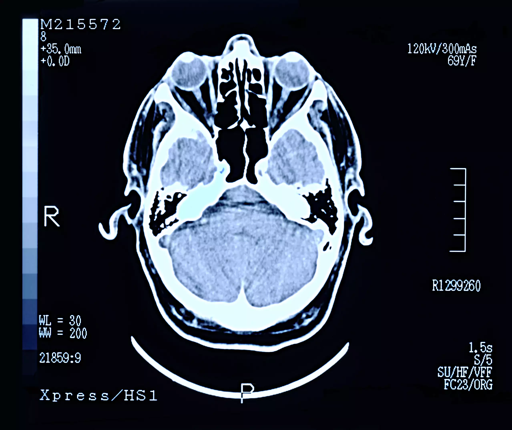

In [66]:
display(im2)

__^ Greyscale did a much better job of identifying the text__

In [67]:
# remove_noise
print(pytesseract.image_to_string(remove_noise(im),config=custom_oem_psm_config))

NE EARRERE

 

ree AORN
ro S909
R1299260
Pee
yi a
21859:9 35
SU/HF/VEF
FC23/0RG

Apress/YHSl


^ This one looks okay

In [70]:
# thresholding  // gives an eror
# print(pytesseract.image_to_string(thresholding(im),config=custom_oem_psm_config))

In [71]:
# dilate
print(pytesseract.image_to_string(dilate(im),config=custom_oem_psm_config))

{PRR

 

OMEN ITI 120kV¥/300mAs

aa be 7,
R1299260

WL = 30

Wi = 200 a

21859:9 ae:
ePIC

Xpress/HSl1


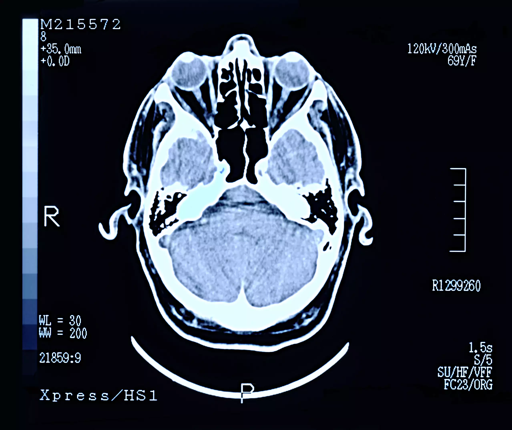

In [72]:
display(im2)

In [73]:
# erode
print(pytesseract.image_to_string(erode(im),config=custom_oem_psm_config))

Ns Dead Neo) tp pe
aa NI nee (rer

een

eee
aan en

poet
et
fae
218

aS

cy 7
pas eae
Oven te)

in|
ie


^ This is the worth output so far

In [74]:
# opening
print(pytesseract.image_to_string(opening(im),config=custom_oem_psm_config))

Me a ee

>

Cae

Sat
at

 

LE0KV/2.00mAs
anh ea

pase alt

F,
eae ays
ARTY

seve


In [75]:
# canny
print(pytesseract.image_to_string(canny(im),config=custom_oem_psm_config))

ced

each)

9)
‘2
<>
eS
<
<<
ce
as)
=]

. a

Sh ‘ed

M2I15572
‘Oa

tT

leas}

 

 

 

2
a
er ONG

SU/TE.

 

Fs)

fo)
°

Apress/H8Si

21898)


In [77]:
# deskew // error
# print(pytesseract.image_to_string(deskew(im),config=custom_oem_psm_config))